In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading data
customers=pd.read_excel(r"C:\Users\varun\OneDrive\Desktop\Aditit_Projects\Distribution Analyst Task - May 2024.xlsx",sheet_name='Customers Data')
company=pd.read_excel(r"C:\Users\varun\OneDrive\Desktop\Aditit_Projects\Distribution Analyst Task - May 2024.xlsx",sheet_name='Company Data',header = 1)
orders=pd.read_excel(r"C:\Users\varun\OneDrive\Desktop\Aditit_Projects\Distribution Analyst Task - May 2024.xlsx",sheet_name='Orders Data')
products=pd.read_excel(r"C:\Users\varun\OneDrive\Desktop\Aditit_Projects\Distribution Analyst Task - May 2024.xlsx",sheet_name='Product Information')

In [3]:
#Summary of the datasets
print(customers.info())
print('-'*50)
print(company.info())
print('-'*50)
print(orders.info())
print('-'*50)
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         658 non-null    int64  
 1   Name           658 non-null    object 
 2   Postcode       658 non-null    object 
 3   Deliveries     658 non-null    int64  
 4   Credit Limit   622 non-null    float64
 5   Openning Time  656 non-null    float64
 6   Closing Time   656 non-null    float64
 7   Servicing DC   621 non-null    object 
 8   Mon            658 non-null    object 
 9   Tue            658 non-null    object 
 10  Wed            658 non-null    object 
 11  Thu            658 non-null    object 
 12  Fri            658 non-null    object 
 13  Sat            658 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 72.1+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data

In [4]:
#Finding duplicates in orders,customers, and products table
print(orders.duplicated().sum())
print(customers.duplicated().sum())
print(products.duplicated().sum())

78619
0
0


In [5]:
#removing duplicates from the orders table
orders.drop_duplicates(inplace=True)
orders.duplicated().sum()

0

In [6]:
customers.head()

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat
0,10001,Nlounge,SO24 9RP,3,20104.0,800.0,1200.0,DC Three,Y,N,N,Y,N,Y
1,10002,Browsezoom,SE22 0BU,1,9000.0,1000.0,1600.0,DC Four,N,Y,N,N,N,N
2,10003,Zoonoodle,BN14 7PQ,1,11182.0,730.0,1330.0,DC Four,N,Y,N,N,N,N
3,10004,Tagfeed,CV32 5JQ,2,22220.0,845.0,1830.0,DC Four,N,Y,N,N,Y,N
4,10005,Demivee,BA12 9JH,2,31098.0,700.0,1945.0,DC Three,N,Y,N,N,Y,N


In [7]:
# General descriptive statistics o the customers data
customers.describe()

,Number,Deliveries,Credit Limit,Openning Time,Closing Time
count,658.000000,658.000000,622.000000,656.000000,656.000000
mean,10329.500000,2.139818,20237.176849,940.396341,1472.911585
std,190.092521,1.321371,8399.574303,298.452873,374.275971
min,10001.000000,0.000000,8626.000000,200.000000,500.000000
25%,10165.250000,1.000000,14209.500000,700.000000,1200.000000
50%,10329.500000,2.000000,18337.000000,845.000000,1472.500000
75%,10493.750000,3.000000,24820.000000,1158.750000,1800.000000
max,10658.000000,6.000000,69752.000000,1700.000000,2200.000000


In [8]:
customers[customers['Credit Limit'].isna()==True]

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat
11,10012,Twiyo,IP31 2HZ,2,NaN,1200.0,1600.0,NaN,N,N,N,N,N,N
60,10061,JumpXS,KY13 9SQ,2,NaN,1600.0,2000.0,NaN,N,N,N,N,N,N
61,10062,Voonder,TW11 9HN,1,NaN,1030.0,1630.0,NaN,N,N,N,N,N,N
87,10088,Aibox,GU12 4AG,3,NaN,800.0,1200.0,NaN,N,N,N,N,N,N
91,10092,Twitterwire,DL10 7JL,2,NaN,545.0,2000.0,NaN,N,N,N,N,N,N
101,10102,Digitube,BT45 5AZ,3,NaN,600.0,1000.0,NaN,N,N,N,N,N,N
110,10111,Yakijo,BS48 3BA,1,NaN,1030.0,1630.0,NaN,N,N,N,N,N,N
111,10112,Skaboo,NG34 4TF,1,NaN,730.0,1330.0,NaN,N,N,N,N,N,N
112,10113,Flipbug,BH25 5RN,2,NaN,1200.0,1730.0,NaN,N,N,N,N,N,N
113,10114,Centizu,ST1 3RG,1,NaN,1600.0,2200.0,NaN,N,N,N,N,N,N


In [9]:
customers[customers['Name']=='Mynte']

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat
163,10164,Mynte,SK14 3BX,2,18804.0,700.0,1100.0,DC One,N,Y,N,Y,N,N
572,10573,Mynte,PA20 0LF,3,19684.0,800.0,1215.0,DC Two,N,Y,N,Y,N,Y
600,10601,Mynte,TR8 5EY,3,23504.0,600.0,1200.0,DC Three,Y,N,Y,N,N,Y
656,10657,Mynte,HP19 8DX,3,NaN,1600.0,2000.0,NaN,N,N,N,N,N,N


In [10]:
#Checking null values in customers table
customers.isna().sum()

Number            0
Name              0
Postcode          0
Deliveries        0
Credit Limit     36
Openning Time     2
Closing Time      2
Servicing DC     37
Mon               0
Tue               0
Wed               0
Thu               0
Fri               0
Sat               0
dtype: int64

In [11]:
#Filling the null values in openinf and closing time usinf ffill method
customers[['Openning Time', 'Closing Time']]=customers[['Openning Time', 'Closing Time']].fillna(method='ffill')

In [12]:
#Converting opening and closing time into datetime format
customers['Openning Time']=pd.to_datetime(customers['Openning Time'],format='%H%M',dayfirst=True).dt.time
customers['Closing Time']=pd.to_datetime(customers['Closing Time'],format='%H%M',dayfirst=True).dt.time

## Task 1
Propose a delivery DC for new stores from the customers data

In [13]:
#creating a new table with customers with no Servcing DC
new_stores=customers[customers['Servicing DC'].isna()].copy()
new_stores.reset_index(drop=True)

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat
0,10010,Blogtags,SL5 9QA,2,15000.0,13:15:00,20:30:00,NaN,N,N,N,N,N,N
1,10012,Twiyo,IP31 2HZ,2,NaN,12:00:00,16:00:00,NaN,N,N,N,N,N,N
2,10061,JumpXS,KY13 9SQ,2,NaN,16:00:00,20:00:00,NaN,N,N,N,N,N,N
3,10062,Voonder,TW11 9HN,1,NaN,10:30:00,16:30:00,NaN,N,N,N,N,N,N
4,10088,Aibox,GU12 4AG,3,NaN,08:00:00,12:00:00,NaN,N,N,N,N,N,N
5,10092,Twitterwire,DL10 7JL,2,NaN,05:45:00,20:00:00,NaN,N,N,N,N,N,N
6,10102,Digitube,BT45 5AZ,3,NaN,06:00:00,10:00:00,NaN,N,N,N,N,N,N
7,10111,Yakijo,BS48 3BA,1,NaN,10:30:00,16:30:00,NaN,N,N,N,N,N,N
8,10112,Skaboo,NG34 4TF,1,NaN,07:30:00,13:30:00,NaN,N,N,N,N,N,N
9,10113,Flipbug,BH25 5RN,2,NaN,12:00:00,17:30:00,NaN,N,N,N,N,N,N


In [14]:
customers.head()

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat
0,10001,Nlounge,SO24 9RP,3,20104.0,08:00:00,12:00:00,DC Three,Y,N,N,Y,N,Y
1,10002,Browsezoom,SE22 0BU,1,9000.0,10:00:00,16:00:00,DC Four,N,Y,N,N,N,N
2,10003,Zoonoodle,BN14 7PQ,1,11182.0,07:30:00,13:30:00,DC Four,N,Y,N,N,N,N
3,10004,Tagfeed,CV32 5JQ,2,22220.0,08:45:00,18:30:00,DC Four,N,Y,N,N,Y,N
4,10005,Demivee,BA12 9JH,2,31098.0,07:00:00,19:45:00,DC Three,N,Y,N,N,Y,N


In [15]:
# Creaing a new column to add Servicing DC based on postalcode
new_stores['New_PostCode']=new_stores['Postcode'].str[:2]
new_stores.head()

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat,New_PostCode
9,10010,Blogtags,SL5 9QA,2,15000.0,13:15:00,20:30:00,NaN,N,N,N,N,N,N,SL
11,10012,Twiyo,IP31 2HZ,2,NaN,12:00:00,16:00:00,NaN,N,N,N,N,N,N,IP
60,10061,JumpXS,KY13 9SQ,2,NaN,16:00:00,20:00:00,NaN,N,N,N,N,N,N,KY
61,10062,Voonder,TW11 9HN,1,NaN,10:30:00,16:30:00,NaN,N,N,N,N,N,N,TW
87,10088,Aibox,GU12 4AG,3,NaN,08:00:00,12:00:00,NaN,N,N,N,N,N,N,GU


In [16]:
new_stores.isna().sum()

Number            0
Name              0
Postcode          0
Deliveries        0
Credit Limit     36
Openning Time     0
Closing Time      0
Servicing DC     37
Mon               0
Tue               0
Wed               0
Thu               0
Fri               0
Sat               0
New_PostCode      0
dtype: int64

In [17]:
def DCassign(postcode):
    if postcode in ['L1', 'WN', 'DL', 'S6', 'OL', 'WA', 'DY', 'BD', 'S7', 'SA', 'DN', 'PR', 'WV', 'NG', 'CW', 'BL', 'SY', 'B7', 'DE', 'SK', 'WF', 'HU',
                    'LS', 'LN', 'YO', 'M5', 'WS', 'S5', 'M1', 'LL', 'HG', 'CH', 'B1', 'ST', 'L2', 'L3', 'M4', 'TF', 'B3', 'LE', 'BB', 'B9', 'HD', 'M2',
                    'S1', 'B4', 'M3', 'WR', 'CV', 'LA']:
        return 'DC One'
    elif postcode in ['TS', 'EH', 'KA', 'NE', 'PH', 'G4', 'IV', 'CA', 'FK', 'SR', 'KY',
                      'BT', 'G6', 'ML', 'DD', 'DH', 'DL', 'G2', 'FY', 'LA', 'PA', 'AB',
                      'G7', 'TD', 'G1']:
        return 'DC Two'
    elif postcode in ['SO', 'BA', 'CF', 'OX', 'NP', 'BS', 'EX', 'SN', 'GL', 'SP', 'RG',
                      'BH', 'TR', 'SA', 'PO', 'TQ', 'DT', 'TA', 'PL', 'HR']:
        return 'DC Three'
    else:
        return 'DC Four'

new_stores['Servicing DC'] = new_stores['New_PostCode'].apply(DCassign)

In [18]:
new_stores.reset_index(drop=True,inplace=True)
new_stores.head()

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat,New_PostCode
0,10010,Blogtags,SL5 9QA,2,15000.0,13:15:00,20:30:00,DC Four,N,N,N,N,N,N,SL
1,10012,Twiyo,IP31 2HZ,2,NaN,12:00:00,16:00:00,DC Four,N,N,N,N,N,N,IP
2,10061,JumpXS,KY13 9SQ,2,NaN,16:00:00,20:00:00,DC Two,N,N,N,N,N,N,KY
3,10062,Voonder,TW11 9HN,1,NaN,10:30:00,16:30:00,DC Four,N,N,N,N,N,N,TW
4,10088,Aibox,GU12 4AG,3,NaN,08:00:00,12:00:00,DC Four,N,N,N,N,N,N,GU


## Task 2
Proposemost efficient delivery days for stores without any from customers table.

In [19]:
# Extracting day and week from date column in orders table
orders['Day']=orders['Delivery Date'].dt.strftime('%a')
orders['Week']=orders['Delivery Date'].dt.isocalendar().week
orders.head()

,Customer,Product,Qty,Order Date,Delivery Date,Priority,DC,Day,Week
0,10001,P00001,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
1,10001,P00002,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
2,10001,P00003,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
3,10001,P00004,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
4,10001,P00005,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18


In [20]:
from pandas.api.types import CategoricalDtype
cat_type=CategoricalDtype(categories=['Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)
orders['Day']=orders['Day'].astype(cat_type)
orders.head()

,Customer,Product,Qty,Order Date,Delivery Date,Priority,DC,Day,Week
0,10001,P00001,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
1,10001,P00002,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
2,10001,P00003,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
3,10001,P00004,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
4,10001,P00005,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18


In [21]:
# Grouping the columns based on 'DC','Week',and 'Day' to know the total quantities each DC delivering per day
qty_per_dc=orders.groupby(['DC','Week','Day']).agg({'Qty':'sum'})
qty_per_dc=qty_per_dc.unstack([0,1]).droplevel(level=0,axis=1)
qty_per_dc

DC    DC Four                              DC One                             \
Week       18       19       20       21       18       19       20       21   
Day                                                                            
Mon   19360.0  19010.0  23035.0  24188.0  16392.0  15182.0  18987.0  17842.0   
Tue   15053.0  16969.0  18928.0  17917.0  15494.0  18201.0  18008.0  18707.0   
Wed   18314.0  21471.0  22638.0  19863.0  14696.0  17577.0  18987.0  17582.0   
Thu   20133.0  19785.0  22200.0  19816.0  12150.0  15134.0  16607.0  14254.0   
Fri   15606.0  16783.0  19938.0  17828.0  16993.0  17693.0  17433.0  17865.0   
Sat   13338.0  13073.0  12946.0  13459.0  10591.0  10625.0   9930.0  10392.0   

DC   DC Three                              DC Two                             
Week       18       19       20       21       18       19       20       21  
Day                                                                           
Mon   10508.0  10486.0  11530.0  11143.0  14462.0  14403.0  16551.0  17522.0  
Tue    7379.0   9603.0   9502.0   9065.0  10453.0  12206.0  12923.0  11959.0  
Wed    8496.0   8865.0  10387.0  10356.0  11122.0  11890.0  12666.0  14524.0  
Thu   10303.0  12180.0  12051.0  11825.0  11455.0  10364.0  11065.0  11107.0  
Fri    7571.0   7506.0   7253.0   7971.0  13608.0  15633.0  14367.0  15176.0  
Sat    7276.0   8142.0   7414.0   7426.0   9247.0   9831.0   9335.0   8635.0

In [22]:
#Creating a table with average deliveries per day for each DC
avg_deliveries_per_day=qty_per_dc.groupby(level=0,axis=1).mean().round()
avg_deliveries_per_day=avg_deliveries_per_day.T.astype(int)
avg_deliveries_per_day

Day,Mon,Tue,Wed,Thu,Fri,Sat
DC,,,,,,
DC Four,21398,17217,20572,20484,17539,13204
DC One,17101,17602,17210,14536,17496,10384
DC Three,10917,8887,9526,11590,7575,7564
DC Two,15734,11885,12550,10998,14696,9262


In [23]:
#Actual Capacities of each DC per day
company=company.rename(columns={'Mon Capability':'Mon','Tue Capability':'Tue','Wed Capability':'Wed','Thu Capability':'Thu','Fri Capability':'Fri','Sat Capability':'Sat',})
DC_Capacity=company.loc[0:3,['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']]
DC_Capacity.index=avg_deliveries_per_day.index
DC_Capacity

,Mon,Tue,Wed,Thu,Fri,Sat
DC,,,,,,
DC Four,20000,20000,20000,15000,15000,20000
DC One,15000,15000,15000,15000,15000,11000
DC Three,20000,20000,10000,10000,10000,6000
DC Two,23000,20000,20000,23000,15000,15000


In [24]:
#Percentage of deliveries being delivered each day
percent_deliveries=avg_deliveries_per_day/DC_Capacity*100
percent_deliveries

Day,Mon,Tue,Wed,Thu,Fri,Sat
DC,,,,,,
DC Four,106.990000,86.085000,102.860000,136.560000,116.926667,66.020000
DC One,114.006667,117.346667,114.733333,96.906667,116.640000,94.400000
DC Three,54.585000,44.435000,95.260000,115.900000,75.750000,126.066667
DC Two,68.408696,59.425000,62.750000,47.817391,97.973333,61.746667


* For stores with one delivery, assigning the day with the fewest deliveries might be appropriate.
* For stores with more than one delivery per week, each DC follows a particular pattern. Therefore, days were assigned based on the pattern and on days that do not exceed the delivery limit.

In [25]:
new_stores['Deliveries'].unique()

array([2, 1, 3, 0, 6, 4], dtype=int64)

In [26]:
new_stores.loc[(new_stores['Deliveries']==1) & (new_stores['Servicing DC']== 'DC One'),'Sat']='Y'
new_stores.loc[(new_stores['Deliveries']==1) & (new_stores['Servicing DC']== 'DC Two'),'Thu']='Y'
new_stores.loc[(new_stores['Deliveries']==1) & (new_stores['Servicing DC']== 'DC Three'),'Tue']='Y'
new_stores.loc[(new_stores['Deliveries']==1) & (new_stores['Servicing DC']== 'DC Four'),'Sat']='Y'

In [27]:
new_stores.loc[(new_stores['Deliveries']==2) & (new_stores['Servicing DC']== 'DC One'),['Wed','Sat']]='Y'
new_stores.loc[(new_stores['Deliveries']==2) & (new_stores['Servicing DC']== 'DC Two'),['Tue','Fri']]='Y'
new_stores.loc[(new_stores['Deliveries']==2) & (new_stores['Servicing DC']== 'DC Three'),['Tue','Fri']]='Y'
new_stores.loc[(new_stores['Deliveries']==2) & (new_stores['Servicing DC']== 'DC Four'),['Wed','Sat']]='Y'

In [28]:
new_stores.loc[(new_stores['Deliveries']==3) & (new_stores['Servicing DC']== 'DC One'),['Mon','Wed','Fri']]='Y'
new_stores.loc[(new_stores['Deliveries']==3) & (new_stores['Servicing DC']== 'DC Two'),['Mon','Wed','Fri']]='Y'
new_stores.loc[(new_stores['Deliveries']==3) & (new_stores['Servicing DC']== 'DC Three'),['Mon','Tue','Fri']]='Y'
new_stores.loc[(new_stores['Deliveries']==3) & (new_stores['Servicing DC']== 'DC Four'),['Mon','Tue','Thu']]='Y'

In [29]:
new_stores.loc[(new_stores['Deliveries']==4) & (new_stores['Servicing DC']== 'DC One'),['Mon','Tue','Wed',"Sat"]]='Y'
new_stores.loc[(new_stores['Deliveries']==4) & (new_stores['Servicing DC']== 'DC Two'),['Mon','Wed','Thu','Sat']]='Y'
new_stores.loc[(new_stores['Deliveries']==4) & (new_stores['Servicing DC']== 'DC Three'),['Mon','Wed','Thu','Fri']]='Y'
new_stores.loc[(new_stores['Deliveries']==4) & (new_stores['Servicing DC']== 'DC Four'),['Mon','Wed','Thu','Fri','Sat']]='Y'

In [30]:
#new_stores.loc[(new_stores['Deliveries']==6) & (new_stores['Servicing DC']== 'DC One'),['Mon','Tue','Wed','Thu','Fri','Sat']]='Y'
#new_stores.loc[(new_stores['Deliveries']==6) & (new_stores['Servicing DC']== 'DC Two'),['Mon','Tue','Wed','Thu','Fri','Sat']]='Y'
#new_stores.loc[(new_stores['Deliveries']==6) & (new_stores['Servicing DC']== 'DC Three'),['Mon','Tue','Wed','Thu','Fri','Sat']]='Y'
new_stores.loc[(new_stores['Deliveries']==6) & (new_stores['Servicing DC']== 'DC Four'),['Mon','Tue','Wed','Thu','Fri','Sat']]='Y'

In [31]:
customers.set_index('Number', inplace=True)
new_stores.set_index('Number', inplace=True)

# Update the original 'stores' DataFrame with the 'new_stores' data
customers.update(new_stores)

# Reset index if needed
customers.reset_index(inplace=True)
customers.head()

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat
0,10001,Nlounge,SO24 9RP,3,20104.0,08:00:00,12:00:00,DC Three,Y,N,N,Y,N,Y
1,10002,Browsezoom,SE22 0BU,1,9000.0,10:00:00,16:00:00,DC Four,N,Y,N,N,N,N
2,10003,Zoonoodle,BN14 7PQ,1,11182.0,07:30:00,13:30:00,DC Four,N,Y,N,N,N,N
3,10004,Tagfeed,CV32 5JQ,2,22220.0,08:45:00,18:30:00,DC Four,N,Y,N,N,Y,N
4,10005,Demivee,BA12 9JH,2,31098.0,07:00:00,19:45:00,DC Three,N,Y,N,N,Y,N


## Task 3
Estimating the quantity of the orders that are missing in orders table

In [32]:
#Filtering the records with missing quantities
missing_orders=orders.loc[orders['Qty'].isna()==True]

In [33]:
orders_without_na=orders.loc[orders['Qty'].isna()==False]

In [34]:
def fill_orders(df1,df2):
    from collections import Counter
    for i in missing_orders['Customer'].unique():
            for j in missing_orders.loc[missing_orders['Customer']==i,'Product'].unique():
                if j  in orders_without_na.loc[(orders_without_na['Customer']==i), 'Product'].unique(): 
                    #print(i,j)
                    qty_list=orders_without_na.loc[(orders_without_na['Customer']==i) & (orders_without_na['Product']==j),'Qty'].to_list()
                    qty_count=Counter(qty_list)
                    #print(qty_count)
                    max_qty=max(qty_list,key=qty_count.get)
                    missing_orders.loc[(missing_orders['Customer']==i) & (missing_orders['Product']==j),'Qty']=max_qty
                else: 
                    avg_qty=orders_without_na.loc[orders_without_na['Customer']==i,'Qty'].mean().round()
                    missing_orders.loc[(missing_orders['Customer']==i) & (missing_orders['Product']==j),'Qty']=avg_qty
    return df2

In [35]:
fill_orders(orders_without_na,missing_orders)

,Customer,Product,Qty,Order Date,Delivery Date,Priority,DC,Day,Week
63509,10071,P00002,1.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
63510,10071,P00070,1.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
63511,10071,P00466,1.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
63512,10071,P00463,3.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
63513,10071,P00965,1.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
...,...,...,...,...,...,...,...,...,...
253904,10305,P00652,2.0,2024-05-21,2024-05-23,Normal,DC Four,Thu,21
253905,10305,P00962,2.0,2024-05-21,2024-05-23,Normal,DC Four,Thu,21
253906,10305,P00858,2.0,2024-05-21,2024-05-23,Normal,DC Four,Thu,21
253907,10305,P00065,2.0,2024-05-21,2024-05-23,Normal,DC Four,Thu,21


In [36]:
missing_orders.head()

,Customer,Product,Qty,Order Date,Delivery Date,Priority,DC,Day,Week
63509,10071,P00002,1.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
63510,10071,P00070,1.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
63511,10071,P00466,1.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
63512,10071,P00463,3.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21
63513,10071,P00965,1.0,2024-05-21,2024-05-23,Normal,DC Three,Thu,21


In [37]:
#Updating the orders table with missing orders
orders.update(missing_orders)

In [38]:
orders.isna().sum()

Customer         0
Product          0
Qty              0
Order Date       0
Delivery Date    0
Priority         0
DC               0
Day              0
Week             0
dtype: int64

## Task 4
Calculate the value of risk per each week

In [39]:
customers.head()

,Number,Name,Postcode,Deliveries,Credit Limit,Openning Time,Closing Time,Servicing DC,Mon,Tue,Wed,Thu,Fri,Sat
0,10001,Nlounge,SO24 9RP,3,20104.0,08:00:00,12:00:00,DC Three,Y,N,N,Y,N,Y
1,10002,Browsezoom,SE22 0BU,1,9000.0,10:00:00,16:00:00,DC Four,N,Y,N,N,N,N
2,10003,Zoonoodle,BN14 7PQ,1,11182.0,07:30:00,13:30:00,DC Four,N,Y,N,N,N,N
3,10004,Tagfeed,CV32 5JQ,2,22220.0,08:45:00,18:30:00,DC Four,N,Y,N,N,Y,N
4,10005,Demivee,BA12 9JH,2,31098.0,07:00:00,19:45:00,DC Three,N,Y,N,N,Y,N


In [40]:
orders.head()

,Customer,Product,Qty,Order Date,Delivery Date,Priority,DC,Day,Week
0,10001,P00001,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
1,10001,P00002,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
2,10001,P00003,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
3,10001,P00004,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18
4,10001,P00005,1.0,2024-04-27,2024-04-29,Normal,DC Three,Mon,18


In [41]:
products.head()

,Code,Name,Supplier,Department,Price
0,P00001,Chicken Thigh - Bone Out,Zoomcast,ambient,107.28
1,P00002,Parsley - Dried,Nlounge,frozen,166.29
2,P00003,"Radish - Black, Winter, Organic",Tagpad,chill,167.34
3,P00004,Chicken Giblets,Dablist,frozen,138.97
4,P00005,Creme De Menthe Green,Babblestorm,ambient,76.22


In [42]:
# Mwrging theorders and products table to calculate value of risk
customers_purchases=customers.merge(pd.merge(orders,products,left_on='Product',right_on='Code',how='inner'),left_on='Number',right_on='Customer',how='inner')

customers_purchases=customers_purchases.rename(columns={'Name_x':'Customer_Name','Name_y':'Product'})
customers_purchases=customers_purchases[['Number','Customer_Name','Credit Limit','Qty', 'Price','Order Date','Delivery Date','Week']]
customers_purchases['Total_Cost']=customers_purchases['Qty']*customers_purchases['Price']
customers_purchases.head()

,Number,Customer_Name,Credit Limit,Qty,Price,Order Date,Delivery Date,Week,Total_Cost
0,10001,Nlounge,20104.0,1.0,107.28,2024-04-27,2024-04-29,18,107.28
1,10001,Nlounge,20104.0,1.0,166.29,2024-04-27,2024-04-29,18,166.29
2,10001,Nlounge,20104.0,1.0,166.29,2024-04-30,2024-05-02,18,166.29
3,10001,Nlounge,20104.0,1.0,166.29,2024-05-07,2024-05-09,19,166.29
4,10001,Nlounge,20104.0,2.0,166.29,2024-05-21,2024-05-23,21,332.58


In [43]:
df=customers_purchases.groupby(["Week",'Number','Customer_Name','Credit Limit']).agg({'Total_Cost':'sum'}).reset_index()
df['Exceeded_Amount']=df['Total_Cost']-df['Credit Limit']
df.head()

,Week,Number,Customer_Name,Credit Limit,Total_Cost,Exceeded_Amount
0,18,10001,Nlounge,20104.0,38403.54,18299.54
1,18,10002,Browsezoom,9000.0,465.45,-8534.55
2,18,10004,Tagfeed,22220.0,39610.68,17390.68
3,18,10005,Demivee,31098.0,44563.50,13465.50
4,18,10006,Jabberbean,13043.0,15572.29,2529.29


In [44]:
df=df.loc[df['Exceeded_Amount']>0]
value_of_risk_per_week=df.groupby(['Number','Customer_Name'],as_index=False).agg({'Exceeded_Amount':'mean'}).round(2)
value_of_risk_per_week

,Number,Customer_Name,Exceeded_Amount
0,10001,Nlounge,24981.65
1,10002,Browsezoom,2564.66
2,10003,Zoonoodle,4995.68
3,10004,Tagfeed,20426.22
4,10005,Demivee,9423.75
...,...,...,...
613,10651,Bubblemix,7446.63
614,10652,Mydo,19739.74
615,10653,Twinder,59846.30
616,10654,Yakidoo,49299.47


In [45]:
#Calculating the percentage of customers spending within the limit
percent_of_customers_spending_within_limit=round((len(customers)-len(value_of_risk_per_week))/len(customers)*100)
percent_of_customers_spending_within_limit

6

## Task 5
Propose ideal daily capacities for each DC. This should meet the demand and minimize cost

In [46]:
company

,DC Number,DC name,Total Capacity,PostCode,Lat,Lon,Mon,Tue,Wed,Thu,Fri,Sat,Sun Capability,Total Fleet
0,DC002,DC One,110000,WF2 0XG,53.711719,-1.520550,20000,20000,20000,15000,15000,20000,0,NaN
1,DC101,DC Two,86000,EH11 4EJ,55.921078,-3.298222,15000,15000,15000,15000,15000,11000,0,NaN
2,DC366,DC Three,76000,RG7 2PQ,51.370128,-1.120164,20000,20000,10000,10000,10000,6000,0,NaN
3,DC951,DC Four,116000,IP14 2PQ,52.182113,1.007362,23000,20000,20000,23000,15000,15000,0,NaN
4,Network Total,NaN,388000,NaN,NaN,NaN,78000,75000,65000,63000,55000,52000,0,NaN


In [47]:
#Calculating overall percentage of deliveries for each DC
percent_deliveries.mean(axis=1).round()

DC
DC Four     103.0
DC One      109.0
DC Three     85.0
DC Two       66.0
dtype: float64

In [48]:
percent_deliveries.round()

Day,Mon,Tue,Wed,Thu,Fri,Sat
DC,,,,,,
DC Four,107.0,86.0,103.0,137.0,117.0,66.0
DC One,114.0,117.0,115.0,97.0,117.0,94.0
DC Three,55.0,44.0,95.0,116.0,76.0,126.0
DC Two,68.0,59.0,63.0,48.0,98.0,62.0


* Based on the percentages being delivered, new capacities were assigned that can minimize the costs

In [49]:
company.loc[company['DC name']=='DC One','Sat']=15000
company.loc[company['DC name']=='DC One','Fri']=20000
company.loc[company['DC name']=='DC Two','Mon']=18000
company.loc[company['DC name']=='DC Two','Fri']=18000
company.loc[company['DC name']=='DC Three','Thu']=15000
company.loc[company['DC name']=='DC Three','Sat']=10000
company.loc[company['DC name']=='DC Three','Mon']=15000
company.loc[company['DC name']=='DC Three','Tue']=15000
company.loc[company['DC name']=='DC Four','Wed']=22000
company.loc[company['DC name']=='DC Four','Fri']=20000

In [50]:
company

,DC Number,DC name,Total Capacity,PostCode,Lat,Lon,Mon,Tue,Wed,Thu,Fri,Sat,Sun Capability,Total Fleet
0,DC002,DC One,110000,WF2 0XG,53.711719,-1.520550,20000,20000,20000,15000,20000,15000,0,NaN
1,DC101,DC Two,86000,EH11 4EJ,55.921078,-3.298222,18000,15000,15000,15000,18000,11000,0,NaN
2,DC366,DC Three,76000,RG7 2PQ,51.370128,-1.120164,15000,15000,10000,15000,10000,10000,0,NaN
3,DC951,DC Four,116000,IP14 2PQ,52.182113,1.007362,23000,20000,22000,23000,20000,15000,0,NaN
4,Network Total,NaN,388000,NaN,NaN,NaN,78000,75000,65000,63000,55000,52000,0,NaN


## Task 6
Analyzing the delivery networks peformance

In [51]:
orders.assign(Delivery_TIme=orders['Delivery Date']-orders['Order Date']).groupby('DC',as_index=False).agg({'Delivery_TIme':['mean']})

,DC,Delivery_TIme
,,mean
0,DC Four,2 days 00:00:00
1,DC One,1 days 23:59:39.131262369
2,DC Three,1 days 23:59:49.250990613
3,DC Two,2 days 00:00:00


In [52]:
orders.groupby('DC')['Delivery Date'].count().sort_values(ascending=False)#/959052*100).round(2)

DC
DC Four     311536
DC One      277391
DC Two      209366
DC Three    160759
Name: Delivery Date, dtype: int64

In [53]:
orders.loc[~(orders['Priority']=='Normal')]

,Customer,Product,Qty,Order Date,Delivery Date,Priority,DC,Day,Week
160,10001,P00159,1.0,2024-05-01,2024-05-02,Next Day,DC Three,Thu,18
272407,10325,P00222,1.0,2024-05-12,2024-05-13,Next Day,DC One,Mon,20
272411,10325,P00395,1.0,2024-05-12,2024-05-13,Next Day,DC One,Mon,20
272412,10325,P00326,2.0,2024-05-12,2024-05-13,Next Day,DC One,Mon,20
272413,10325,P00506,1.0,2024-05-12,2024-05-13,Next Day,DC One,Mon,20
...,...,...,...,...,...,...,...,...,...
864464,10530,P00467,1.0,2024-05-16,2024-05-17,Next Day,DC Three,Fri,20
864465,10530,P00473,1.0,2024-05-16,2024-05-17,Next Day,DC Three,Fri,20
864466,10530,P00474,4.0,2024-05-16,2024-05-17,Next Day,DC Three,Fri,20
864467,10530,P00295,1.0,2024-05-16,2024-05-17,Next Day,DC Three,Fri,20


In [54]:
orders.groupby(['DC','Priority']).agg({'Order Date':'count'})

Order Date
DC       Priority            
DC Four  Normal        311536
DC One   Next Day          67
         Normal        277324
DC Three Next Day          20
         Normal        160739
DC Two   Normal        209366

In [55]:
deliveries_per_day=orders.groupby(['Day']).agg(Total_Deliveries=pd.NamedAgg(column='Day',aggfunc='count'))
deliveries_per_day

,Total_Deliveries
Day,
Mon,188446
Tue,161174
Wed,170423
Thu,165770
Fri,163915
Sat,109324


<Axes: title={'center': 'Daily Delivery Volume'}, xlabel='Day', ylabel='Number of Deliveries'>

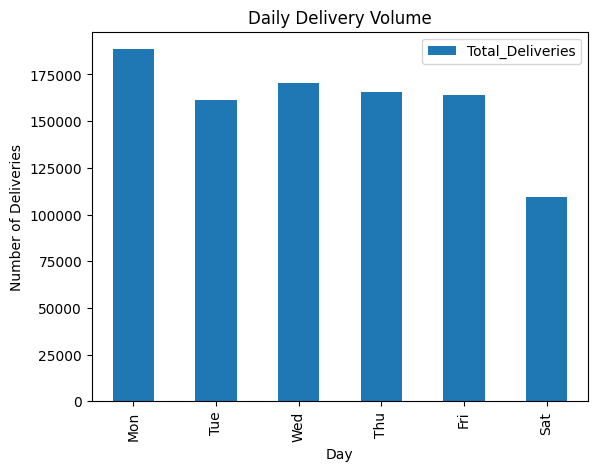

In [56]:
deliveries_per_day.plot(kind='bar',xlabel='Day',ylabel='Number of Deliveries',title='Daily Delivery Volume')

<Axes: title={'center': 'Top 10 Products'}, xlabel='Product', ylabel='Count'>

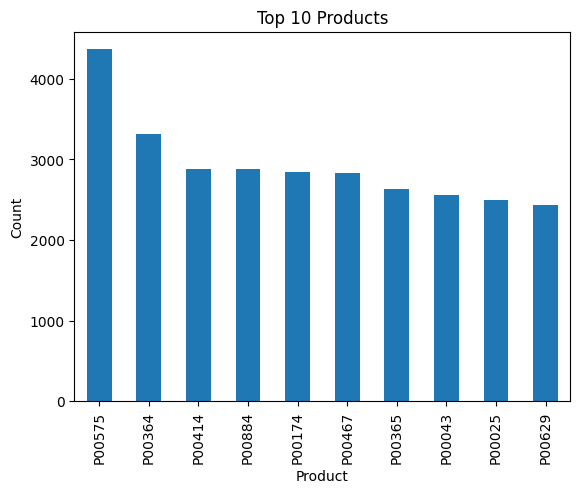

In [57]:
orders['Product'].value_counts().head(10).plot(kind='bar', xlabel='Product',ylabel='Count',
                                              title='Top 10 Products')

In [58]:
df=orders.groupby(['DC','Week']).agg({'Qty':'sum'}).unstack().droplevel(level=0,axis=1)
df

Week,18,19,20,21
DC,,,,
DC Four,101804.0,107091.0,119685.0,113817.0
DC One,86316.0,94412.0,99952.0,96642.0
DC Three,51533.0,56782.0,58137.0,57957.0
DC Two,70347.0,74327.0,76907.0,78923.0


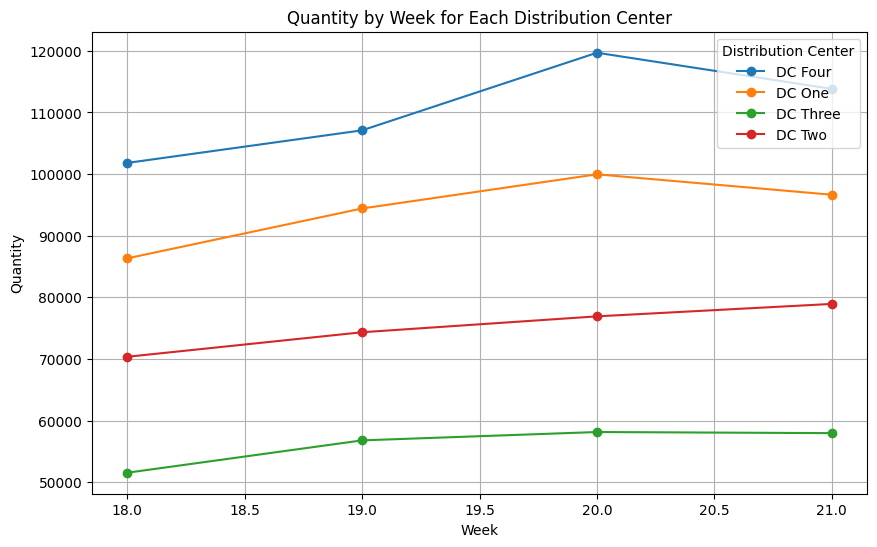

In [59]:
plt.figure(figsize=(10, 6))

# Plot each row (DC) as a line
for dc in df.index:
    plt.plot(df.columns, df.loc[dc], marker='o', label=dc)

# Adding title and labels
plt.title('Quantity by Week for Each Distribution Center')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.legend(title='Distribution Center', loc='upper right')
plt.grid(True)

plt.show()